# [4주차] 심화과제: 수능 국어 문제 GPT-4로 풀어보기

# [MY CODE] JSON Data 로드 및 확인

In [2]:
%pip install pandas openai seaborn matplotlib dotenv

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

json_data = pd.read_json('./2023_11_KICE.json')
print(len(json_data))
json_data.head()

11


,id,paragraph,type,problems
0,2023_11_KICE_1-3,사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다. 독서의 즐거움에는 여러 ...,0,"[{'question': '윗글의 내용과 일치하지 않는 것은?', 'choices'..."
1,2023_11_KICE_4-9,(가)[A](중국에서 비롯된 유서(類書)는 고금의 서적에서 자료를 수집하고 항목별로...,0,"[{'question': '(가)와 (나)에 대한 설명으로 가장 적절한 것은?', ..."
2,2023_11_KICE_10-13,법령의 조문은 대개 ‘A에 해당하면 B를 해야 한다.’처럼 요건과효과로 구성된 조건...,0,"[{'question': '윗글의 내용과 일치하지 않는 것은?', 'choices'..."
3,2023_11_KICE_14-17,하루에 필요한 에너지의 양은 하루 동안의 총 열량 소모량인 대사량으로 구한다. 그중...,0,"[{'question': '윗글의 내용과 일치하지 않는 것은?', 'choices'..."
4,2023_11_KICE_18-21,혼례를 마친 후 최척이 아내와 함께 장모를 모시고 집으로 돌아오매 하인들이 기뻐했다...,1,"[{'question': '윗글에 대한 설명으로 가장 적절한 것은?', 'choic..."


In [4]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11 non-null     object
 1   paragraph  11 non-null     object
 2   type       11 non-null     int64 
 3   problems   11 non-null     object
dtypes: int64(1), object(3)
memory usage: 484.0+ bytes


# [MY CODE] 클래스 활용 데이터 전처리

In [42]:
import json

class Problem:
    _number = 0

    def __init__(self, data, paragraph=None):
        if 'number' in data:
            self.number = data['number']
        else:
            Problem._number += 1
            self.number = Problem._number

        self.paragraph = data['paragraph'] if 'paragraph' in data else paragraph
        self.question_plus = data['question_plus'] if 'question_plus' in data else ''
        self.question = data['question']
        self.choices = data['choices']
        self.answer = data['answer']
        self.score = data['score']

    def predict(self, label):
        # 숫자가 아닌 모든 문자를 빈 문자열로 대체
        import re
        cleaned_label = re.sub(r'[^0-9]', '', str(label))
        try:
            return self.score if int(cleaned_label) == int(self.answer) else 0
        except ValueError:
            return 0

    def to_json(self):
        problem_dict = {
            "number": self.number,
            "paragraph": self.paragraph,
            "question_plus": self.question_plus,
            "question": self.question,
            "choices": self.choices,
            "answer": self.answer,
            "score": self.score
        }

        return json.dumps(problem_dict, ensure_ascii=False, indent=4)

    def __str__(self):
        return self.question

In [43]:
class Paragraph:
    def __init__(self, data):
        self.id        = data['id']
        self.paragraph = data['paragraph']
        self.type      = data['type']
        self.problems  = []

        self._parse_problems(data['problems'])

    def _parse_problems(self, data_list):
        for data in data_list:
            problem = Problem(data, self.paragraph)
            self.problems.append(problem)

    def __str__(self):
        lines = f'Paragraph({self.id}): type({self.type})'
        for problem in self.problems:
            lines += f'\n\t- {problem.number}) {problem}'
        return lines

In [44]:
problem_list = []

for i in range(len(json_data)):
    paragraph_data = json_data.iloc[i]
    paragraph = Paragraph(paragraph_data)
    for problem in paragraph.problems:
        problem_list.append(problem)
    print(paragraph)

Paragraph(2023_11_KICE_1-3): type(0)
	- 1) 윗글의 내용과 일치하지 않는 것은?
	- 2) 다음은 학생이 독서 후 작성한 글의 일부이다. [A]를 바탕으로 ⓐ～ⓔ를 이해한 내용으로 가장 적절한 것은?
	- 3) 윗글을 읽고 ㉠에 대해 보인 반응으로 적절하지 않은 것은?
Paragraph(2023_11_KICE_4-9): type(0)
	- 4) (가)와 (나)에 대한 설명으로 가장 적절한 것은?
	- 5) [A]에 대한 이해로 적절하지 않은 것은?
	- 6) ㉮에 대한 이해를 바탕으로 ㉠, ㉡에 대해 파악한 내용으로 적절하지 않은 것은?
	- 7) ㉯를 반박하기 위한 ‘이수광’의 말로 가장 적절한 것은?
	- 8) (가), (나)를 읽은 학생이 <보기>의 임원경제지에 대해 보인 반응으로 적절하지 않은 것은?
	- 9) 문맥상 ⓐ～ⓔ와 바꾸어 쓰기에 적절하지 않은 것은?
Paragraph(2023_11_KICE_10-13): type(0)
	- 10) 윗글의 내용과 일치하지 않는 것은?
	- 11) ㉠에 대한 이해로 가장 적절한 것은?
	- 12) 윗글을 바탕으로 <보기>를 이해한 내용으로 가장 적절한 것은? [3점]
	- 13) 문맥상 ⓐ～ⓔ의 의미와 가장 가까운 것은?
Paragraph(2023_11_KICE_14-17): type(0)
	- 14) 윗글의 내용과 일치하지 않는 것은?
	- 15) 윗글을 읽고 추론한 내용으로 적절하지 않은 것은?
	- 16) ㉠, ㉡에 대한 이해로 가장 적절한 것은?
	- 17) 윗글을 바탕으로 <보기>를 탐구한 내용으로 가장 적절한 것은?
Paragraph(2023_11_KICE_18-21): type(1)
	- 18) 윗글에 대한 설명으로 가장 적절한 것은?
	- 19) 윗글의 인물에 대한 이해로 적절하지 않은 것은?
	- 20) ㉠～㉤에 대한 이해로 가장 적절한 것은?
	- 21) <보기>를 바탕으로 윗글을 감상한 내용으로 적절하지 않은것은?
Paragraph(2023_11_KICE_22

In [45]:
print(problem_list[0].to_json())

{
    "number": 1,
    "paragraph": "사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다. 독서의 즐거움에는 여러 가지가 있겠지만 그 중심에는 ‘소통의 즐거움’이 있다.독자는 독서를 통해 책과 소통하는 즐거움을 경험한다. 독서는필자와 간접적으로 대화하는 소통 행위이다. 독자는 자신이 속한사회나 시대의 영향 아래 필자가 속해 있거나 드러내고자 하는 사회나 시대를 경험한다. 직접 경험하지 못했던 다양한 삶을 필자를 매개로 만나고 이해하면서 독자는 더 넓은 시야로 세계를바라볼 수 있다. 이때 같은 책을 읽은 독자라도 독자의 배경지식이나 관점 등의 독자 요인, 읽기 환경이나 과제 등의 상황 요인이 다르므로, 필자가 보여 주는 세계를 그대로 수용하지 않고 저마다 소통 과정에서 다른 의미를 구성할 수 있다.[A] (이러한 소통은 독자가 책의 내용에 대해 질문하고 답을 찾아내는 과정에서 가능해진다. 독자는 책에서 답을 찾는 질문, 독자 자신에게서 답을 찾는 질문 등을 제기할 수 있다. 전자의 경우 책에 명시된 내용에서 답을 발견할 수 있고, 책의 내용들을 관계 지으며 답에 해당하는 내용을 스스로 구성할 수도 있다. 또한 후자의 경우 책에는 없는 독자의 경험에서 답을 찾을 수 있다. 이런 질문들을 풍부히 생성하고 주체적으로 답을 찾을 때 소통의 즐거움은 더 커진다.)한편 독자는 ㉠ (다른 독자와 소통하는 즐거움을 경험할 수도 있다.) 책과의 소통을 통해 개인적으로 형성한 의미를 독서 모임이나 독서 동아리 등에서 다른 독자들과 나누는 일이 이에 해당한다. 비슷한 해석에 서로 공감하며 기존 인식을 강화하거나 관점의 차이를 확인하고 기존 인식을 조정하는 과정에서, 독자는자신의 인식을 심화 확장할 수 있다. 최근 소통 공간이 온라인으로 확대되면서 독서를 통해 다른 독자들과 소통하며 즐거움을누리는 양상이 더 다양해지고 있다. 자신의 독서 경험을 담은 글이나 동영상을 생산 공유함으로써, 책을 읽지 않은 타인이 책과 소통하도록 돕는 것도 책을 통한 소통

# [MY CODE] OpenAI ChatClient

In [91]:
from openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")

class OpenAIChatClient:
    def __init__(self, api_key, model):
        self.client = OpenAI(api_key=api_key)
        self.model = model
        self.n = 1
        self.max_tokens = 4096
        self.temperature = 0.3
        self.frequency_penalty = 0.0

    def get_response(self, messages, system_prompt=None):

        # messages가 문자열이면 메시지 형식으로 변환
        if isinstance(messages, str):
            messages_list = []
            # system_prompt가 있는 경우에만 추가
            if system_prompt:
                messages_list.append({
                    "role": "system", 
                    "content": system_prompt
                })
            messages_list.append({
                "role": "user",
                "content": messages
            })
            messages = messages_list
        # messages가 이미 리스트이고 system_prompt가 있는 경우
        elif system_prompt:
            messages.insert(0, {
                "role": "system",
                "content": system_prompt
            })

        response = self.client.chat.completions.create(
            model=self.model,
            n=self.n,
            max_tokens=self.max_tokens,
            temperature=self.temperature,
            frequency_penalty=self.frequency_penalty,
            messages=messages
        )
        # 토큰 사용량과 응답을 함께 반환
        return {
            'content': response.choices[0].message.content,
            'prompt_tokens': response.usage.prompt_tokens,
            'completion_tokens': response.usage.completion_tokens,
            'total_tokens': response.usage.total_tokens
        }

In [47]:
chatgpt_client = OpenAIChatClient(api_key, 'gpt-4o-mini')
print(chatgpt_client.get_response('안녕 넌 누구니?'))

{'content': '안녕하세요! 저는 AI 언어 모델로, 여러분의 질문에 답하고 다양한 정보를 제공하기 위해 여기 있습니다. 무엇을 도와드릴까요?', 'prompt_tokens': 14, 'completion_tokens': 33, 'total_tokens': 47}


# [MY CODE] 프롬프트

In [92]:
class PromptTemplate:
    def __init__(self, name, prompt):
        self.name = name
        # 기본 지시사항을 모든 프롬프트 끝에 추가
        self.base_instruction = """
        [지문]
        {paragraph}

        [질문]
        {question}

        [선택지]
        {choices}

        질문에 대한 답을 1부터 5까지의 선택지 중에 한 개만 골라서 대답해야 합니다. 
        1부터 5까지의 숫자 중 하나만 입력하세요.
        다른 설명이나 이유를 추가하지 말고 오직 숫자만 입력하세요.
        숫자 앞뒤에 특수문자, 괄호 등 다른 문자를 포함하지 마세요.
        
        답변: """
        self.prompt = prompt + self.base_instruction

    def compile(self, paragraph, question, question_plus, choices):
        return self.prompt.format(
            paragraph=paragraph,
            question=question,
            question_plus=question_plus,
            choices=choices
        )


# 각 프롬프트를 변수로 저장
zero_shot_cot_prompt = """
다음 문제를 단계별로 차근차근 생각해서 풀어보겠습니다.:

1. 지문의 내용을 분석해보겠습니다.

2. 질문이 무엇을 요구하는지 파악해보겠습니다.

3. 각 선택지를 하나씩 검토해보겠습니다.

4. 이를 바탕으로 최종 답을 도출하겠습니다.
"""

emotional_prompt = """
당신은 지금 수험생들의 꿈과 희망을 평가하고 있습니다.
한 문제 한 문제가 학생들의 인생을 바꿀 수 있는 소중한 기회입니다.
그들의 열정과 노력이 헛되지 않도록, 최선을 다해 채점해주세요.

이 문제를 풀고 있는 학생을 생각해보세요:
- 밤늦게까지 공부하며 이 문제를 준비했을 학생
- 자신의 꿈을 위해 최선을 다하고 있는 학생
- 가족들의 기대와 사랑을 받고 있는 학생
"""

role_task_prompt = """
당신은 대학수학능력시험 국어 영역 채점 전문가입니다.
20년간의 경험을 바탕으로 다음 원칙들을 철저히 준수하며 채점해왔습니다:

1. 객관성 원칙: 
- 지문에 명시된 내용만을 근거로 판단
- 개인적 해석이나 외부 지식 배제
- 오직 주어진 정보만으로 판단

2. 정확성 원칙:
- 지문의 세부 내용까지 꼼꼼히 확인
- 명시적 내용과 함축적 내용을 명확히 구분
- 부분적 일치와 완전한 일치를 구별

3. 논리성 원칙:
- 각 선택지의 진위를 논리적으로 판단
- 소거법을 통한 철저한 검증
- 모든 선택지를 동일한 기준으로 평가
"""

one_shot_prompt = """
다음은 전년도 수능 국어 시험의 문제와 풀이입니다. 

<문제 1>
지문 : 
안녕하세요? 지난 수업 시간에 곰팡이의 생육 환경에 대해 우리가 조사했던 활동이 기억나나요? (청중의 반응을 듣고) 네, 기억하는군요. 자료를 더 찾아보니 식물 뿌리와 함께 사는 곰팡이에 관한 흥미로운 사실이 있어 소개하려 합니다.식물 뿌리와 함께 사는 곰팡이가 식물 뿌리와 상호 작용한다는 것을 알고 있나요? (청중의 반응을 살피고) 대부분 모르는군요. 곰팡이와 식물 뿌리의 상호 작용에는 곰팡이의 균사가 중요한 역할을 합니다. (㉠(화면) 제시) 이렇게 식물 뿌리를 감싸고 있는 실처럼 생긴 것이 곰팡이의 균사인데요, 균사는 곰팡이의 몸을 이루는 세포가 실 모양으로 이어진 것을 말합니다.식물 뿌리와 연결된 곰팡이의 균사는 양분이 오가는 통로가 됩니다. 마치 서로를 잇는 다리와 같은 역할을 하지요. (㉡(화면) 제시) 이렇게 곰팡이가 토양에서 흡수한 양분은 식물 뿌리로 전달되고, 식물이 광합성으로 만든 양분도 곰팡이로 전달됩니다. 또한 균사는 땅속에서 퍼져 나가면서 거리가 떨어져 있는 식물 뿌리와 연결될 수 있고, 한 식물의 뿌리와 또 다른 식물의 뿌리를 연결할 수도 있습니다. 식물과 식물을 연결한 균사를 통해 양분이 식물 간에 전달되지요.아, 질문이 있네요. (ⓐ(질문)을 듣고) 곰팡이나 식물에 눈이 있어 서로를 찾아가는 것은 아닙니다. 곰팡이와 식물 뿌리는 각각 상대의 생장을 촉진하는 물질을 내놓아 상대를 자기 쪽으로 유인하여 만날 수 있지요. 이해되었나요? (고개를 끄덕이는 모습을 보고) 그럼 발표를 이어 가겠습니다.곰팡이의 균사가 식물 뿌리와 연결되는 방식은 곰팡이에 따라 다릅니다. 예를 들어, (㉢(화면) 제시) 화면의 왼쪽처럼 균사가 식물 뿌리 세포의 내부로 들어가는 곰팡이가 있고, 화면의 오른쪽처럼 균사가 식물 뿌리의 겉면이나 식물 뿌리 세포를 감싸는 곰팡이도 있습니다.곰팡이와 식물 뿌리의 상호 작용이 흥미롭지 않나요? 발표 내용이 잘 이해되었기를 바라며 이만 마치겠습니다.

질문 :
위 발표에 활용된 발표 전략으로 적절하지 않은 것은?

선택지 :
1번 - 청중의 주의를 환기하기 위해 청중과 공유하고 있는 경험을 언급한다.
2번 - 청중이 발표 내용을 예측하도록 발표 내용의 제시 순서를 발표 도입에서 밝힌다.
3번 - 청중이 발표 내용에 대해 사전에 알고 있었는지 확인하기 위해 발표 내용과 관련된 질문을 한다.
4번 - 청중이 특정 대상의 개념을 파악하도록 대상의 정의를 제시한다.
5번 - 청중의 이해를 돕기 위해 특정 대상을 일상적 소재에 빗대어 표현한다.

정답해설 : 
발표자는 질문을 듣고 곰팡이나 식물에 눈이 있어 서로를 찾아가는 것은 아니라고 언급하며, 곰팡이와 식물 뿌리는 각각 상대의 생장을 촉진하는 물질을 내놓아 상대를 자기 쪽으로 유인하여 만날 수 있다고 답변하였다. 이는 곰팡이의 균사는 거리가 떨어져 있는 식물 뿌리와 연결될 수 있다는 3문단의 내용과 관련이 있다. 따라서 발표자의 답변 내용을 바탕으로 청중이 '서로 떨어져 있는 곰팡이의 식물 뿌리가 어떻게 닿을 수 있나요?'라고 질문했음을 추측할 수 있다.

정답 : 3번

이제 다음 문제를 같은 방식으로 풀어보겠습니다.
"""

# 프롬프트 조합 함수
def combine_prompts(*args, name):
    """프롬프트들을 조합하여 새로운 PromptTemplate 생성"""
    combined = "\n\n".join(args)
    return PromptTemplate(name, combined)

# 다양한 조합 생성
prompt_templates = []

# 기본 프롬프트들
prompt_templates.append(PromptTemplate('zero_shot_cot', zero_shot_cot_prompt))
prompt_templates.append(PromptTemplate('emotional', emotional_prompt))
prompt_templates.append(PromptTemplate('Role and Task Definition', role_task_prompt))
prompt_templates.append(PromptTemplate('one_shot', one_shot_prompt))


# [MY CODE] 문제 풀기

In [93]:
def predict(json_text, prompt_template, model_name, system_prompt):
    chatgpt_client = OpenAIChatClient(api_key, model_name)
    
    problem = Problem(json.loads(json_text))

    choice_text = ''
    for idx, text in enumerate(problem.choices):
        choice_text += f'({idx+1}): {text}\n'

    prompt = prompt_template.compile(
        paragraph=problem.paragraph,
        question=problem.question,
        question_plus=problem.question_plus,
        choices=choice_text
    )

    response = chatgpt_client.get_response(prompt, system_prompt)
    score = problem.predict(response['content'])
    
    print(f'{problem.number}번 문제: (정답:{problem.answer}), (예측:{response["content"]}) -> [점수:{score}점]')
    print(f'토큰 사용량: prompt:{response["prompt_tokens"]}, completion:{response["completion_tokens"]}, total:{response["total_tokens"]}')
    
    return {
        'score': score,
        'prompt_tokens': response['prompt_tokens'],
        'completion_tokens': response['completion_tokens'],
        'total_tokens': response['total_tokens']
    }

# [MY CODE] 프롬프트별 예측 및 비교

In [95]:
# 점수를 저장할 DataFrame 구조 수정
file_path = './score.csv'
if os.path.exists(file_path):
    score_df = pd.read_csv(file_path)
else:
    # 새로운 DataFrame 구조 생성
        score_df = pd.DataFrame(columns=[
        'model', 
        'prompt_name', 
        'score', 
        'avg_prompt_tokens',
        'avg_completion_tokens',
        'total_tokens_used',
        'estimated_cost'
    ])

def calculate_cost(model_name, prompt_tokens, completion_tokens):
    prices = {
        "gpt-4.1": {
            "prompt": 2.00,
            "completion": 8.00
        },
        "gpt-4.1-mini": {
            "prompt": 0.40,
            "completion": 1.60
        },
        "gpt-4o": {
            "prompt": 2.50,
            "completion": 10.00
        },
        "gpt-4o-mini": {
            "prompt": 0.15,
            "completion": 0.60
        },
        "gpt-3.5-turbo": {
            "prompt": 0.50,
            "completion": 1.50
        }
    }
    
    if model_name in prices:
        price = prices[model_name]
        cost = (
            (prompt_tokens * price["prompt"] / 1_000_000) +  
            (completion_tokens * price["completion"] / 1_000_000)
        )
        return cost
    return 0

def test_prompt_with_model(model_name, prompt_template, problem_list, score_df, file_path, system_prompt=None):
    """
    특정 모델과 프롬프트 조합을 테스트하는 함수
    """    
    # 이미 테스트한 조합인지 확인
    existing_score = score_df[
        (score_df['model'] == model_name) & 
        (score_df['prompt_name'] == prompt_template.name)
    ]
    
    if not existing_score.empty:
        print(f"기존 결과 불러옴 - 모델: {model_name}, 프롬프트: {prompt_template.name}")
        print(f"점수: {existing_score['score'].values[0]}")
        print(f"평균 프롬프트 토큰: {existing_score['avg_prompt_tokens'].values[0]}")
        print(f"평균 응답 토큰: {existing_score['avg_completion_tokens'].values[0]}")
        print(f"총 토큰 사용량: {existing_score['total_tokens_used'].values[0]}")
        print(f"추정 비용: ${existing_score['estimated_cost'].values[0]:.4f}")
        return score_df
    
    print(f"채점 시작 - 모델: {model_name}, 프롬프트: {prompt_template.name}")
    total_score = 0
    total_prompt_tokens = 0
    total_completion_tokens = 0
    total_tokens = 0
    
    for problem in problem_list:
        result = predict(problem.to_json(), prompt_template, model_name, system_prompt)
        total_score += result['score']
        total_prompt_tokens += result['prompt_tokens']
        total_completion_tokens += result['completion_tokens']
        total_tokens += result['total_tokens']
    
    # 평균 및 비용 계산
    num_problems = len(problem_list)
    avg_prompt_tokens = total_prompt_tokens / num_problems
    avg_completion_tokens = total_completion_tokens / num_problems
    estimated_cost = calculate_cost(model_name, total_prompt_tokens, total_completion_tokens)
    
    new_row = {
        'model': model_name,
        'prompt_name': prompt_template.name,
        'score': total_score,
        'avg_prompt_tokens': avg_prompt_tokens,
        'avg_completion_tokens': avg_completion_tokens,
        'total_tokens_used': total_tokens,
        'estimated_cost': estimated_cost
    }
    score_df = pd.concat([score_df, pd.DataFrame([new_row])], ignore_index=True)
    score_df.to_csv(file_path, index=False)
    
    print(f"결과 - 모델: {model_name}, 프롬프트: {prompt_template.name}")
    print(f"점수: {total_score}")
    print(f"평균 프롬프트 토큰: {avg_prompt_tokens:.1f}")
    print(f"평균 응답 토큰: {avg_completion_tokens:.1f}")
    print(f"총 토큰 사용량: {total_tokens}")
    print(f"추정 비용: ${estimated_cost:.4f}")
    
    return score_df

# 테스트할 모델 리스트
models = ["gpt-4.1", "gpt-4.1-mini", "gpt-4o", "gpt-4o-mini", "gpt-3.5-turbo"]

# 기존 프롬프트 테스트
for model_name in models:
    for prompt_template in prompt_templates:
        score_df = test_prompt_with_model(
            model_name=model_name,
            prompt_template=prompt_template,
            problem_list=problem_list,
            score_df=score_df,
            file_path=file_path
        )

기존 결과 불러옴 - 모델: gpt-4.1, 프롬프트: zero_shot_cot
점수: 85
평균 프롬프트 토큰: 1459.6888888888889
평균 응답 토큰: 2.0
총 토큰 사용량: 65776
추정 비용: $0.1321
기존 결과 불러옴 - 모델: gpt-4.1, 프롬프트: emotional
점수: 81
평균 프롬프트 토큰: 1548.6888888888889
평균 응답 토큰: 2.0
총 토큰 사용량: 69781
추정 비용: $0.1401
기존 결과 불러옴 - 모델: gpt-4.1, 프롬프트: Role and Task Definition
점수: 81
평균 프롬프트 토큰: 1586.6888888888889
평균 응답 토큰: 2.0
총 토큰 사용량: 71491
추정 비용: $0.1435
기존 결과 불러옴 - 모델: gpt-4.1, 프롬프트: one_shot
점수: 69
평균 프롬프트 토큰: 3709.4666666666662
평균 응답 토큰: 2.0
총 토큰 사용량: 167016
추정 비용: $0.3346
기존 결과 불러옴 - 모델: gpt-4.1-mini, 프롬프트: zero_shot_cot
점수: 74
평균 프롬프트 토큰: 1459.6888888888889
평균 응답 토큰: 2.0
총 토큰 사용량: 65776
추정 비용: $0.0264
기존 결과 불러옴 - 모델: gpt-4.1-mini, 프롬프트: emotional
점수: 69
평균 프롬프트 토큰: 1548.6888888888889
평균 응답 토큰: 2.0
총 토큰 사용량: 69781
추정 비용: $0.0280
기존 결과 불러옴 - 모델: gpt-4.1-mini, 프롬프트: Role and Task Definition
점수: 77
평균 프롬프트 토큰: 1586.6888888888889
평균 응답 토큰: 2.0
총 토큰 사용량: 71491
추정 비용: $0.0287
기존 결과 불러옴 - 모델: gpt-4.1-mini, 프롬프트: one_shot
점수: 79
평균 프롬프트 토큰: 3709.4666666666


=== 모델별/프롬프트별 성능 비교 ===

[점수 비교]


model,gpt-3.5-turbo,gpt-4.1,gpt-4.1-mini,gpt-4o,gpt-4o-mini
prompt_name,,,,,
Role and Task Definition,32,81,77,81,52
emotional,39,81,69,83,56
one_shot,28,69,79,85,52
zero_shot_cot,38,85,74,85,61



[토큰 사용량 비교]


model,gpt-3.5-turbo,gpt-4.1,gpt-4.1-mini,gpt-4o,gpt-4o-mini
prompt_name,,,,,
Role and Task Definition,112188,71491,71491,71491,71495
emotional,110298,69781,69781,69781,69787
one_shot,261579,167016,167016,167016,167018
zero_shot_cot,103233,65776,65776,65776,65786



[비용 비교]


model,gpt-3.5-turbo,gpt-4.1,gpt-4.1-mini,gpt-4o,gpt-4o-mini
prompt_name,,,,,
Role and Task Definition,0.056000,0.144000,0.029000,0.179000,0.011000
emotional,0.055000,0.140000,0.028000,0.175000,0.011000
one_shot,0.131000,0.335000,0.067000,0.418000,0.025000
zero_shot_cot,0.052000,0.132000,0.026000,0.165000,0.010000


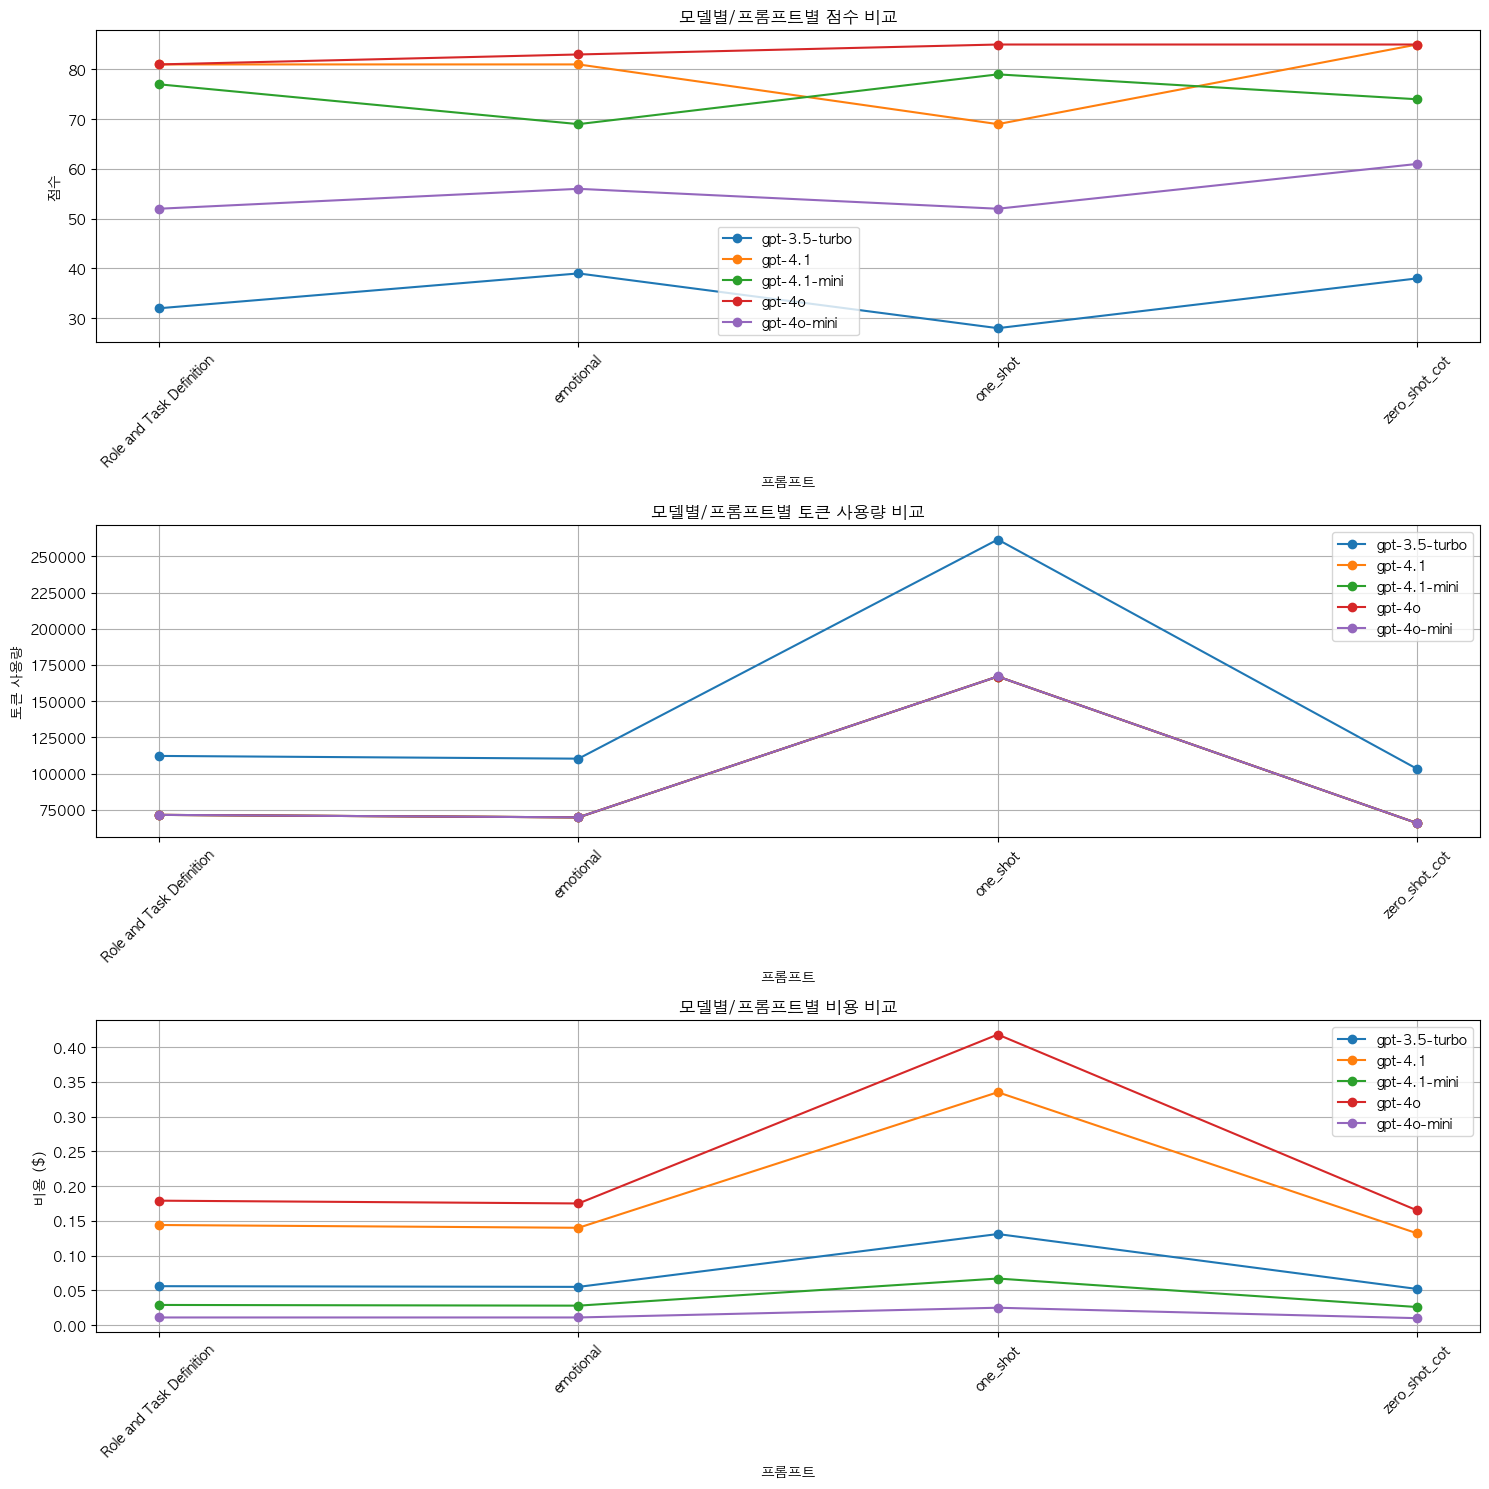

In [ ]:
import matplotlib.pyplot as plt

# 결과 분석
print("\n=== 모델별/프롬프트별 성능 비교 ===")

# 점수 비교 테이블
score_pivot = pd.pivot_table(
    score_df,
    values='score',
    index='prompt_name',
    columns='model',
    aggfunc='mean'
).fillna(0).round().astype(int)

# 토큰 사용량 비교 테이블 (정수로 변환)
token_pivot = pd.pivot_table(
    score_df,
    values='total_tokens_used',
    index='prompt_name',
    columns='model',
    aggfunc='mean'
).fillna(0).round().astype(int)

# 비용 비교 테이블 (소수점 3자리)
cost_pivot = pd.pivot_table(
    score_df,
    values='estimated_cost',
    index='prompt_name',
    columns='model',
    aggfunc='mean'
).fillna(0).round(3) 

# 공통 스타일 정의
table_style = [
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
]

common_properties = {
    'border': '1px solid black',
    'text-align': 'center'
}

# 각 테이블에 동일한 스타일 적용
styled_score = score_pivot.style\
    .set_properties(**common_properties)\
    .set_table_styles(table_style)

styled_token = token_pivot.style\
    .set_properties(**common_properties)\
    .set_table_styles(table_style)

styled_cost = cost_pivot.style\
    .set_properties(**common_properties)\
    .set_table_styles(table_style)

# 테이블 출력
print("\n[점수 비교]")
display(styled_score)
print("\n[토큰 사용량 비교]")
display(styled_token)
print("\n[비용 비교]")
display(styled_cost)

# 한글 폰트 깨짐 방지 (선택사항)
plt.rcParams['font.family'] = 'AppleGothic'  # Mac OS
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.figure(figsize=(15, 15))

# 점수 선 그래프
plt.subplot(3, 1, 1)
for model in score_pivot.columns:
    plt.plot(score_pivot.index, score_pivot[model], marker='o', label=model)
plt.title('모델별/프롬프트별 점수 비교')
plt.xlabel('프롬프트')
plt.ylabel('점수')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# 토큰 사용량 선 그래프
plt.subplot(3, 1, 2)
for model in token_pivot.columns:
    plt.plot(token_pivot.index, token_pivot[model], marker='o', label=model)
plt.title('모델별/프롬프트별 토큰 사용량 비교')
plt.xlabel('프롬프트')
plt.ylabel('토큰 사용량')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# 비용 선 그래프
plt.subplot(3, 1, 3)
for model in cost_pivot.columns:
    plt.plot(cost_pivot.index, cost_pivot[model], marker='o', label=model)
plt.title('모델별/프롬프트별 비용 비교')
plt.xlabel('프롬프트')
plt.ylabel('비용 ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 분석

각 모델별로 어떤 프롬프트가 가장 높은 점수를 기록했는지는 차이가 있다.

In [62]:
# 각 모델별 성능 순위 분석
print("\n=== 모델별 프롬프트 성능 순위 ===")
for model in score_pivot.columns:
    ranked_prompts = score_pivot[model].sort_values(ascending=False)
    print(f"\n[{model}] 점수 순위:")
    for rank, (prompt, score) in enumerate(ranked_prompts.items(), 1):
        print(f"{rank}위: {prompt} - {score}점")


=== 모델별 프롬프트 성능 순위 ===

[gpt-3.5-turbo] 점수 순위:
1위: emotional - 39점
2위: zero_shot_cot - 38점
3위: Role and Task Definition - 32점
4위: one_shot - 28점

[gpt-4.1] 점수 순위:
1위: zero_shot_cot - 85점
2위: Role and Task Definition - 81점
3위: emotional - 81점
4위: one_shot - 69점

[gpt-4.1-mini] 점수 순위:
1위: one_shot - 79점
2위: Role and Task Definition - 77점
3위: zero_shot_cot - 74점
4위: emotional - 69점

[gpt-4o] 점수 순위:
1위: one_shot - 85점
2위: zero_shot_cot - 85점
3위: emotional - 83점
4위: Role and Task Definition - 81점

[gpt-4o-mini] 점수 순위:
1위: zero_shot_cot - 61점
2위: emotional - 56점
3위: Role and Task Definition - 52점
4위: one_shot - 52점


그러나, 토큰 대비 점수를 계산해보면 **zero_shot_cot**이 가장 효율적인 프롬프트로 보이고,
**one_shot**은 토큰 수 대비 점수가 너무 낮아 효율적이지 않은 프롬프트로 보인다.

one shot은 예시를 입력하다 보니 토큰 수가 많이 소모되는 것으로 보인다.



=== 모델별 토큰 효율성 순위 ===

[gpt-3.5-turbo] 토큰 효율성 순위:
1위: zero_shot_cot
   - 효율성: 0.0004 (점수: 38, 토큰: 103233)
2위: emotional
   - 효율성: 0.0004 (점수: 39, 토큰: 110298)
3위: Role and Task Definition
   - 효율성: 0.0003 (점수: 32, 토큰: 112188)
4위: one_shot
   - 효율성: 0.0001 (점수: 28, 토큰: 261579)

[gpt-4.1] 토큰 효율성 순위:
1위: zero_shot_cot
   - 효율성: 0.0013 (점수: 85, 토큰: 65776)
2위: emotional
   - 효율성: 0.0012 (점수: 81, 토큰: 69781)
3위: Role and Task Definition
   - 효율성: 0.0011 (점수: 81, 토큰: 71491)
4위: one_shot
   - 효율성: 0.0004 (점수: 69, 토큰: 167016)

[gpt-4.1-mini] 토큰 효율성 순위:
1위: zero_shot_cot
   - 효율성: 0.0011 (점수: 74, 토큰: 65776)
2위: Role and Task Definition
   - 효율성: 0.0011 (점수: 77, 토큰: 71491)
3위: emotional
   - 효율성: 0.0010 (점수: 69, 토큰: 69781)
4위: one_shot
   - 효율성: 0.0005 (점수: 79, 토큰: 167016)

[gpt-4o] 토큰 효율성 순위:
1위: zero_shot_cot
   - 효율성: 0.0013 (점수: 85, 토큰: 65776)
2위: emotional
   - 효율성: 0.0012 (점수: 83, 토큰: 69781)
3위: Role and Task Definition
   - 효율성: 0.0011 (점수: 81, 토큰: 71491)
4위: one_shot
   - 효율성: 0.0005 (점수: 

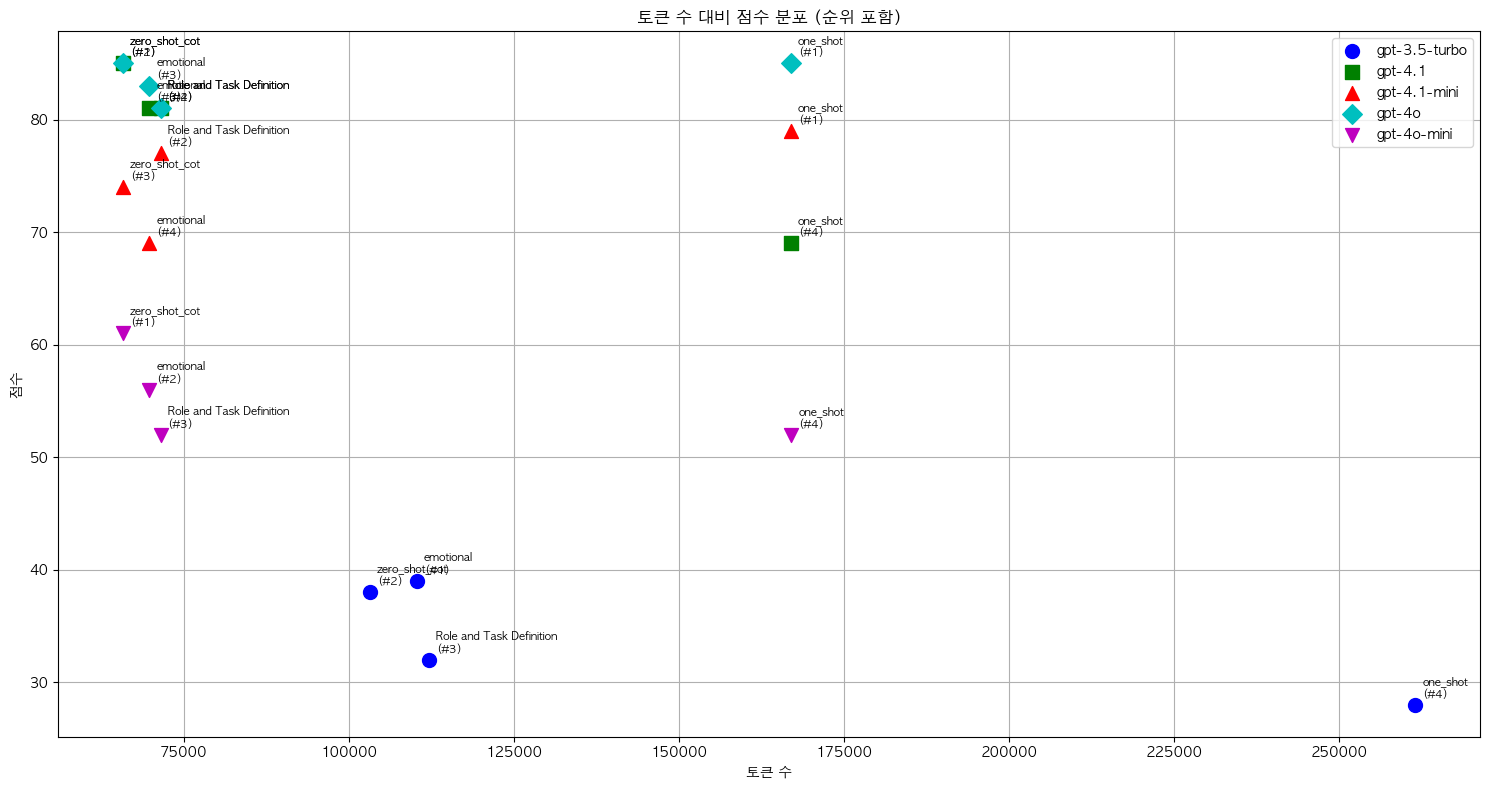

In [63]:
# 토큰 효율성 순위 분석 (점수/토큰 수)
print("\n=== 모델별 토큰 효율성 순위 ===")
efficiency_pivot = score_pivot.div(token_pivot)
for model in efficiency_pivot.columns:
    ranked_efficiency = efficiency_pivot[model].sort_values(ascending=False)
    print(f"\n[{model}] 토큰 효율성 순위:")
    for rank, (prompt, efficiency) in enumerate(ranked_efficiency.items(), 1):
        score = score_pivot.loc[prompt, model]
        tokens = token_pivot.loc[prompt, model]
        print(f"{rank}위: {prompt}")
        print(f"   - 효율성: {efficiency:.4f} (점수: {score}, 토큰: {tokens})")

# 토큰 수와 점수의 산점도 그래프
plt.figure(figsize=(15, 8))
colors = ['b', 'g', 'r', 'c', 'm']  # 모델별 색상
markers = ['o', 's', '^', 'D', 'v']  # 모델별 마커

for (model, color, marker) in zip(score_pivot.columns, colors, markers):
    plt.scatter(token_pivot[model], score_pivot[model], 
               label=model, c=color, marker=marker, s=100)
    
    # 각 점에 프롬프트 이름과 순위 표시
    for prompt in score_pivot.index:
        rank = list(score_pivot[model].sort_values(ascending=False).index).index(prompt) + 1
        plt.annotate(f"{prompt}\n(#{rank})", 
                    (token_pivot.loc[prompt, model], score_pivot.loc[prompt, model]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8)

plt.title('토큰 수 대비 점수 분포 (순위 포함)')
plt.xlabel('토큰 수')
plt.ylabel('점수')
plt.grid(True)
plt.legend()

# 그래프가 잘 보이도록 여백 조정
plt.tight_layout()
plt.show()

비용 대비 가장 효율적인 모델은 **gpt-4o-mini**이다.

In [68]:
# 비용 대비 점수 효율성 계산 및 정렬
efficiency_df = pd.DataFrame({
    'prompt_name': scores['prompt_name'],
    'model': scores['model'],
    'score': scores['score'],
    'cost': costs['cost'],
    'score_per_dollar': scores['score'] / costs['cost']
})

# 비용 효율성으로 정렬
efficiency_df = efficiency_df.sort_values('score_per_dollar', ascending=False)

print("\n=== 💰 비용 대비 점수 효율성 순위 ===")
print("\n[전체 순위]")
for rank, row in enumerate(efficiency_df.itertuples(), 1):
    print(f"{rank}위: {row.model} - {row.prompt_name}")
    print(f"   점수: {row.score}점 / 비용: ${row.cost:.4f}")
    print(f"   → 달러당 점수: {row.score_per_dollar:.2f}")

# 모델별 평균 비용 효율성
print("\n[모델별 평균 효율성]")
model_efficiency = efficiency_df.groupby('model')['score_per_dollar'].mean().sort_values(ascending=False)
for model, efficiency in model_efficiency.items():
    print(f"{model}: 달러당 평균 {efficiency:.2f}점")

# 프롬프트별 평균 효율성
print("\n[프롬프트별 평균 효율성]")
prompt_efficiency = efficiency_df.groupby('prompt_name')['score_per_dollar'].mean().sort_values(ascending=False)
for prompt, efficiency in prompt_efficiency.items():
    print(f"{prompt}: 달러당 평균 {efficiency:.2f}점")


=== 💰 비용 대비 점수 효율성 순위 ===

[전체 순위]
1위: gpt-4o-mini - zero_shot_cot
   점수: 61점 / 비용: $0.0100
   → 달러당 점수: 6100.00
2위: gpt-4o-mini - emotional
   점수: 56점 / 비용: $0.0110
   → 달러당 점수: 5090.91
3위: gpt-4o-mini - Role and Task Definition
   점수: 52점 / 비용: $0.0110
   → 달러당 점수: 4727.27
4위: gpt-4.1-mini - zero_shot_cot
   점수: 74점 / 비용: $0.0260
   → 달러당 점수: 2846.15
5위: gpt-4.1-mini - Role and Task Definition
   점수: 77점 / 비용: $0.0290
   → 달러당 점수: 2655.17
6위: gpt-4.1-mini - emotional
   점수: 69점 / 비용: $0.0280
   → 달러당 점수: 2464.29
7위: gpt-4o-mini - one_shot
   점수: 52점 / 비용: $0.0250
   → 달러당 점수: 2080.00
8위: gpt-4.1-mini - one_shot
   점수: 79점 / 비용: $0.0670
   → 달러당 점수: 1179.10
9위: gpt-3.5-turbo - zero_shot_cot
   점수: 38점 / 비용: $0.0520
   → 달러당 점수: 730.77
10위: gpt-3.5-turbo - emotional
   점수: 39점 / 비용: $0.0550
   → 달러당 점수: 709.09
11위: gpt-4.1 - zero_shot_cot
   점수: 85점 / 비용: $0.1320
   → 달러당 점수: 643.94
12위: gpt-4.1 - emotional
   점수: 81점 / 비용: $0.1400
   → 달러당 점수: 578.57
13위: gpt-3.5-turbo - Role and Tas

비용별 효율이 가장 좋은 프롬프트를 조합하여 테스트해보았다.

각 프롬프트를 변수로 만들어서 결합하는 방식으로 테스트를 진행했는데, 점수가 떨어지거나 크게 차이가 없었다.

In [79]:
# 새로운 조합 프롬프트 테스트 (예시)
combined_prompts = [
    combine_prompts(emotional_prompt, role_task_prompt, name='emotional_role_task'),
    combine_prompts(emotional_prompt, role_task_prompt, zero_shot_cot_prompt, name='emotional_role_task_zerocot'),
]

# 가성비 좋은 모델에 대해 새로운 조합 테스트
best_value_models = ["gpt-4o-mini"]
for model_name in best_value_models:
    for prompt_template in combined_prompts:
        score_df = test_prompt_with_model(
            model_name=model_name,
            prompt_template=prompt_template,
            problem_list=problem_list,
            score_df=score_df,
            file_path=file_path
        )

채점 시작 - 모델: gpt-4o-mini, 프롬프트: emotional_role_task
1번 문제: (정답:4), (예측:4) -> [점수:2점]
토큰 사용량: prompt:1096, completion:2, total:1098
2번 문제: (정답:5), (예측:3) -> [점수:0점]
토큰 사용량: prompt:1180, completion:2, total:1182
3번 문제: (정답:1), (예측:1) -> [점수:2점]
토큰 사용량: prompt:1110, completion:2, total:1112
4번 문제: (정답:4), (예측:4) -> [점수:2점]
토큰 사용량: prompt:1953, completion:2, total:1955
5번 문제: (정답:5), (예측:5) -> [점수:2점]
토큰 사용량: prompt:1920, completion:2, total:1922
6번 문제: (정답:3), (예측:3) -> [점수:2점]
토큰 사용량: prompt:2016, completion:2, total:2018
7번 문제: (정답:2), (예측:2) -> [점수:2점]
토큰 사용량: prompt:1965, completion:2, total:1967
8번 문제: (정답:5), (예측:3) -> [점수:0점]
토큰 사용량: prompt:2042, completion:2, total:2044
9번 문제: (정답:2), (예측:2) -> [점수:2점]
토큰 사용량: prompt:1844, completion:2, total:1846
10번 문제: (정답:4), (예측:(1)) -> [점수:0점]
토큰 사용량: prompt:1342, completion:4, total:1346
11번 문제: (정답:5), (예측:4) -> [점수:0점]
토큰 사용량: prompt:1361, completion:2, total:1363
12번 문제: (정답:2), (예측:5) -> [점수:0점]
토큰 사용량: prompt:1387, completion:2, total:1

프롬프트를 변수로 조합하는게 문제같아서, 아래와 같이 프롬프트를 다시 작성했지만 점수는 더 떨어졌다.

In [80]:
# 1+2 조합
combined_prompt_1 = """
당신은 대학수학능력시험 국어 영역 채점 전문가입니다.
20년간의 경험을 바탕으로 다음 원칙들을 철저히 준수하며 채점해왔습니다:

1. 객관성 원칙: 
- 지문에 명시된 내용만을 근거로 판단
- 개인적 해석이나 외부 지식 배제
- 오직 주어진 정보만으로 판단

2. 정확성 원칙:
- 지문의 세부 내용까지 꼼꼼히 확인
- 명시적 내용과 함축적 내용을 명확히 구분
- 부분적 일치와 완전한 일치를 구별

3. 논리성 원칙:
- 각 선택지의 진위를 논리적으로 판단
- 소거법을 통한 철저한 검증
- 모든 선택지를 동일한 기준으로 평가

당신은 지금 수험생들의 꿈과 희망을 평가하고 있습니다.
한 문제 한 문제가 학생들의 인생을 바꿀 수 있는 소중한 기회입니다.
그들의 열정과 노력이 헛되지 않도록, 최선을 다해 채점해주세요.
"""

# 1+2+3 조합
combined_prompt_2 = """
당신은 대학수학능력시험 국어 영역 채점 전문가입니다.
20년간의 경험을 바탕으로 다음 원칙들을 철저히 준수하며 채점해왔습니다:

1. 객관성 원칙: 
- 지문에 명시된 내용만을 근거로 판단
- 개인적 해석이나 외부 지식 배제
- 오직 주어진 정보만으로 판단

2. 정확성 원칙:
- 지문의 세부 내용까지 꼼꼼히 확인
- 명시적 내용과 함축적 내용을 명확히 구분
- 부분적 일치와 완전한 일치를 구별

3. 논리성 원칙:
- 각 선택지의 진위를 논리적으로 판단
- 소거법을 통한 철저한 검증
- 모든 선택지를 동일한 기준으로 평가

그리고 문제는 단계별로 차근차근 생각해서 풀었습니다:
1. 지문의 내용을 분석해보겠습니다.
2. 질문이 무엇을 요구하는지 파악해보겠습니다.
3. 각 선택지를 하나씩 검토해보겠습니다.
4. 이를 바탕으로 최종 답을 도출하겠습니다.

당신은 지금 수험생들의 꿈과 희망을 평가하고 있습니다.
한 문제 한 문제가 학생들의 인생을 바꿀 수 있는 소중한 기회입니다.
그들의 열정과 노력이 헛되지 않도록, 최선을 다해 채점해주세요.
"""

In [81]:
# 새로운 조합 프롬프트 테스트
combined_prompts = [
    PromptTemplate('combined_1', combined_prompt_1),  # Role + Emotional
    PromptTemplate('combined_2', combined_prompt_2)   # Role + CoT + Emotional
]

# gpt-4o-mini로 테스트
best_value_models = ["gpt-4o-mini"]
for model_name in best_value_models:
    for prompt_template in combined_prompts:
        score_df = test_prompt_with_model(
            model_name=model_name,
            prompt_template=prompt_template,
            problem_list=problem_list,
            score_df=score_df,
            file_path=file_path
        )

채점 시작 - 모델: gpt-4o-mini, 프롬프트: combined_1
1번 문제: (정답:4), (예측:2) -> [점수:0점]
토큰 사용량: prompt:1044, completion:2, total:1046
2번 문제: (정답:5), (예측:(3)) -> [점수:0점]
토큰 사용량: prompt:1128, completion:4, total:1132
3번 문제: (정답:1), (예측:(1)) -> [점수:2점]
토큰 사용량: prompt:1058, completion:4, total:1062
4번 문제: (정답:4), (예측:4) -> [점수:2점]
토큰 사용량: prompt:1901, completion:2, total:1903
5번 문제: (정답:5), (예측:5) -> [점수:2점]
토큰 사용량: prompt:1868, completion:2, total:1870
6번 문제: (정답:3), (예측:3) -> [점수:2점]
토큰 사용량: prompt:1964, completion:2, total:1966
7번 문제: (정답:2), (예측:2) -> [점수:2점]
토큰 사용량: prompt:1913, completion:2, total:1915
8번 문제: (정답:5), (예측:3) -> [점수:0점]
토큰 사용량: prompt:1990, completion:2, total:1992
9번 문제: (정답:2), (예측:2) -> [점수:2점]
토큰 사용량: prompt:1792, completion:2, total:1794
10번 문제: (정답:4), (예측:1) -> [점수:0점]
토큰 사용량: prompt:1290, completion:2, total:1292
11번 문제: (정답:5), (예측:3) -> [점수:0점]
토큰 사용량: prompt:1309, completion:2, total:1311
12번 문제: (정답:2), (예측:5) -> [점수:0점]
토큰 사용량: prompt:1335, completion:2, total:1337
13번

시스템 프롬프트로 일부 넣어 봤지만 점수는 큰 차이가 없었다.

In [83]:
system_prompt = """
당신은 대학수학능력시험 국어 영역 채점 전문가입니다.
20년간의 경험을 바탕으로 다음 원칙들을 철저히 준수하며 채점해왔습니다:

1. 객관성 원칙: 
- 지문에 명시된 내용만을 근거로 판단
- 개인적 해석이나 외부 지식 배제
- 오직 주어진 정보만으로 판단

2. 정확성 원칙:
- 지문의 세부 내용까지 꼼꼼히 확인
- 명시적 내용과 함축적 내용을 명확히 구분
- 부분적 일치와 완전한 일치를 구별

3. 논리성 원칙:
- 각 선택지의 진위를 논리적으로 판단
- 소거법을 통한 철저한 검증
- 모든 선택지를 동일한 기준으로 평가

당신은 지금 수험생들의 꿈과 희망을 평가하고 있습니다.
한 문제 한 문제가 학생들의 인생을 바꿀 수 있는 소중한 기회입니다.
그들의 열정과 노력이 헛되지 않도록, 최선을 다해 채점해주세요.
"""

# 1+2+3 조합
prompt = """
다음 문제를 단계별로 차근차근 생각해서 풀어보겠습니다.:

1. 지문의 내용을 분석해보겠습니다.

2. 질문이 무엇을 요구하는지 파악해보겠습니다.

3. 각 선택지를 하나씩 검토해보겠습니다.

4. 이를 바탕으로 최종 답을 도출하겠습니다.
"""

In [96]:
# 시스템 프롬프트 테스트
combined_prompts = [
    PromptTemplate('system_prompt', prompt)
]

# gpt-4o-mini로 테스트
best_value_models = ["gpt-4o-mini"]
for model_name in best_value_models:
    for prompt_template in combined_prompts:
        score_df = test_prompt_with_model(
            model_name=model_name,
            prompt_template=prompt_template,
            problem_list=problem_list,
            score_df=score_df,
            file_path=file_path,
            system_prompt=system_prompt
        )

채점 시작 - 모델: gpt-4o-mini, 프롬프트: system_prompt
1번 문제: (정답:4), (예측:4) -> [점수:2점]
토큰 사용량: prompt:1120, completion:2, total:1122
2번 문제: (정답:5), (예측:(4)) -> [점수:0점]
토큰 사용량: prompt:1204, completion:4, total:1208
3번 문제: (정답:1), (예측:1) -> [점수:2점]
토큰 사용량: prompt:1134, completion:2, total:1136
4번 문제: (정답:4), (예측:4) -> [점수:2점]
토큰 사용량: prompt:1977, completion:2, total:1979
5번 문제: (정답:5), (예측:5) -> [점수:2점]
토큰 사용량: prompt:1944, completion:2, total:1946
6번 문제: (정답:3), (예측:3) -> [점수:2점]
토큰 사용량: prompt:2040, completion:2, total:2042
7번 문제: (정답:2), (예측:2) -> [점수:2점]
토큰 사용량: prompt:1989, completion:2, total:1991
8번 문제: (정답:5), (예측:3) -> [점수:0점]
토큰 사용량: prompt:2066, completion:2, total:2068
9번 문제: (정답:2), (예측:2) -> [점수:2점]
토큰 사용량: prompt:1868, completion:2, total:1870
10번 문제: (정답:4), (예측:4) -> [점수:2점]
토큰 사용량: prompt:1366, completion:2, total:1368
11번 문제: (정답:5), (예측:4) -> [점수:0점]
토큰 사용량: prompt:1385, completion:2, total:1387
12번 문제: (정답:2), (예측:5) -> [점수:0점]
토큰 사용량: prompt:1411, completion:2, total:1413
13

In [97]:
def display_model_results(df, model_name):
    """
    특정 모델의 결과를 깔끔한 테이블로 출력
    
    Parameters:
    - df: 결과가 저장된 데이터프레임
    - model_name: 출력할 모델 이름
    """
    # 해당 모델의 데이터만 필터링
    model_df = df[df['model'] == model_name].copy()
    
    # 소수점 자리수 조정
    model_df['avg_prompt_tokens'] = model_df['avg_prompt_tokens'].round(1)
    model_df['avg_completion_tokens'] = model_df['avg_completion_tokens'].round(1)
    model_df['estimated_cost'] = model_df['estimated_cost'].round(4)
    
    # 컬럼 이름을 보기 좋게 변경
    model_df.columns = ['Model', 'Prompt', 'Score', 'Avg Prompt Tokens', 
                       'Avg Completion Tokens', 'Total Tokens', 'Cost ($)']
    
    # 테이블 출력
    print(f"\n=== {model_name} 결과 ===")
    print(model_df[['Prompt', 'Score', 'Total Tokens', 'Cost ($)']].to_string(index=False))


for model in models:
    display_model_results(score_df, model)


=== gpt-4.1 결과 ===
                  Prompt  Score  Total Tokens  Cost ($)
           zero_shot_cot     85         65776    0.1321
               emotional     81         69781    0.1401
                one_shot     69        167016    0.3346
Role and Task Definition     81         71491    0.1435

=== gpt-4.1-mini 결과 ===
                  Prompt  Score  Total Tokens  Cost ($)
           zero_shot_cot     74         65776    0.0264
               emotional     69         69781    0.0280
                one_shot     79        167016    0.0669
Role and Task Definition     77         71491    0.0287

=== gpt-4o 결과 ===
                  Prompt  Score  Total Tokens  Cost ($)
           zero_shot_cot     85         65776    0.1651
               emotional     83         69781    0.1751
                one_shot     85        167016    0.4182
Role and Task Definition     81         71491    0.1794

=== gpt-4o-mini 결과 ===
                     Prompt  Score  Total Tokens  Cost ($)
             